In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
from scipy import stats
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpl_patches
from scipy.stats import spearmanr
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import gridspec

In [2]:
df=pd.read_table('FigS2.csv',sep='\t')
df.head()

,Sample,Phi2,PhiNPQ,RelativeChlorophyll,Experiment
0,F1-3,0.700,0.084,34.54,Exp1
1,F1-3,0.708,0.082,34.84,Exp1
2,F1-3,0.695,0.090,27.10,Exp1
3,F10-10-101,0.641,0.109,26.24,Exp1
4,F10-10-101,0.662,0.102,26.06,Exp1


In [5]:
Exp1=df.loc[df['Experiment'] == 'Exp1']
Exp2=df.loc[df['Experiment'] == 'Exp2']
Exp2.head()

,Sample,Phi2,PhiNPQ,RelativeChlorophyll,Experiment
85,F13-8,0.685,0.041,35.53,Exp2
86,F13-8,0.711,0.040,43.21,Exp2
87,F13-8,0.714,0.045,32.12,Exp2
88,F9-3,0.702,0.060,32.25,Exp2
89,F9-3,0.693,0.066,27.49,Exp2


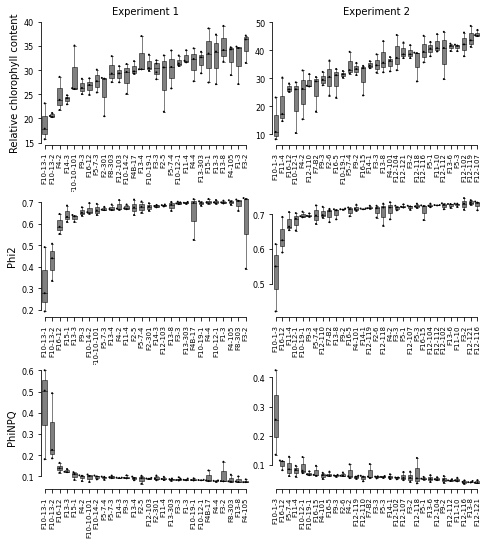

In [8]:
boxprops = {'edgecolor': 'black', 'linewidth': 0.5, 'facecolor': 'grey'}
lineprops = {'color': 'k', 'linewidth': 0.5}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops,
                       'width': 0.6})
swarmplot_kwargs = dict({'size': 1.5,'color':'black'})
# Order=['S1-1','S1-1-irt1(E32fs)','S1-1-irt1(A62fs)','F10-13-1','F13-8','F3-2']
cm=1/2.54
fig,axes = plt.subplots(3,2,sharey=False,figsize=(17*cm,19*cm))
# fig,axes = plt.subplots(3,2,sharey=False,figsize=(15,12))

def plot(dataframe,phenotype,title,idx1,idx2,condition):
    Order= dataframe.groupby('Sample').agg({phenotype:'median'}).sort_values(by=[phenotype],ascending=condition)
    sns.boxplot(x='Sample',
                y=phenotype,
                data=dataframe,
                color='grey',
                order=Order.index,
                ax=axes[idx1,idx2],
                **boxplot_kwargs)
    sns.swarmplot(x='Sample',
                y=phenotype,
                data=dataframe,
                color='0',
                order=Order.index,
                s=2,
                ax=axes[idx1,idx2])
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel(title)
    axes[idx1,idx2].tick_params(labelsize=8)
    axes[idx1,idx2].tick_params(labelsize=7,axis='x',rotation=90)
    axes[idx1,idx2].set_ylabel(title,fontsize=10)
    axes[idx1,idx2].set_xlabel('')
plot(Exp1,'RelativeChlorophyll','Relative chlorophyll content',0,0,True)
axes[0,0].set_title('Experiment 1',fontsize=10)
plot(Exp1,'Phi2','Phi2',1,0,True)
plot(Exp1,'PhiNPQ','PhiNPQ',2,0,False)
plot(Exp2,'RelativeChlorophyll','Relative chlorophyll content',0,1,True)
axes[0,1].set_ylabel('')
axes[0,1].set_title('Experiment 2',fontsize=10)
plot(Exp2,'Phi2','Phi2',1,1,True)
axes[1,1].set_ylabel('')
plot(Exp2,'PhiNPQ','PhiNPQ',2,1,False)
axes[2,1].set_ylabel('')
sns.despine(trim=True)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=0)
plt.savefig("FigS2.png", format="png",bbox_inches="tight",facecolor="w",dpi=400)